# Chapter 6: Bayesian Model fitting II

# Exercises

## Exercise 1 (20 points)

You have a set of $n$ data points, $\{x_i\}$, which have been drawn from a Gaussian distribution of known mean $\mu$, and unknown variance, $\sigma^2$
We want to find the posterior PDF over the variance. Show that when you adopt the following prior for the variance

$$p(\sigma^2 | \alpha, \beta) = \frac{1}{Z} \sigma^{-2 \alpha - 2} \exp\left(-\frac{\beta}{\sigma^2}\right)$$

the posterior is conjugate with this prior ($\alpha > 0$ and $\beta>0$). Write down all of your steps.

## Exercice 2 (35 points)

We revisit the exercise of the lighthouse, but this time we will completely solve the problem in 2 dimensions.

**Recall of the problem**: A lighthouse is somewhere off a piece of straight coastline at a position $x$ along the shore and a distance $y$ out at sea. It emits short flashes (perfectly collimated) at random times and hence at random azimuths, $\theta$, from its position, _i.e._, $p(\theta) = constant$. You see these flashes on the coast while walking along the shore. You record your position $D_k$ along the coastline at the instant you see a flash, but you do not record the direction the flash came from.

* the dataset of $\{D_k\}$ is in the file `lighthouse.dat`. (Same dataset as before) 
* All distances are in $km$.

We assume (prior information) that the lighthouse is constrained to be located within the rectangle $-2 < x < 2$ , $0 < y < 2$ , with uniform prior, where $x=0$ coincides with $D=0$.

Below is a schematic to help you understand the situation.

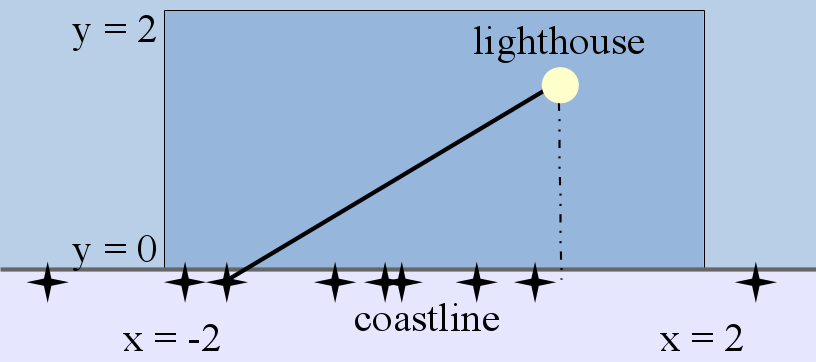

In [3]:
from IPython.display import Image
Image('lh_schema.png')

In the previous episode of this exercise, we worked out the posterior probability distribution $p(y|x, \{D_k\}$ of the lighthouse. Now, we work out $p(x, y | \{D_k\}$.

From the information given, $\theta_k$ for any $k$-th flash must lie between $-\pi/2$ and $+\pi/2$ radians, so the prior for the $k$-th flash is:
$$ p(\theta_k | x, y) = \frac{1}{\pi}$$

And from elementary trigonometry, we can write:
$$ y \tan(\theta_k) = D_k − x$$

A the variable transformation leads to write the likelihood of a single $D_k$ as
$$p( D_k | x,y) = \frac{y/\pi}{(D_k - x)^2 + y^2}$$

This tells us that the probability that the $k$-th flash will be recorded at position $D_k$ , given the coordinates of the lighthouse $(x, y)$, is given by a Cauchy distribution in $D_k$.

Assuming the flashes independent, thus the positions $\{D_k\}$ are also independent, the posterior of the position is

$$p(x, y | \{D_k\}) = \frac{1}{Z} p( \{D_k\} | x,y)p(x, y) = \frac{1}{Z} \prod_k \frac{y/\pi}{(D_k - x)^2 + y^2}$$

with $Z$ is the posterior normalization constant.

Inferring the position of the lighthouse from the data involves the estimation of both $x$ and $y$. This exercise will show you that from a one dimensional dataset, and a correct model definition, one can infer two dimensional information about the lighthouse.

We will use the tools you learned from the lectures so far, however many procedures exist and new methods will be learned in later chapters. In this exercise in particular, you should evaluate the necessary integrals just by summing on a regular, dense grid.

1. Gridding the values: Grid the $(x,y)$ space allowed by your prior with a sensible step size and compute at each point the posterior value $p(x, y |\{D_k\})$. Be aware of the influence of your stepsize, make a sensible choice (you may need to adjust it in the following steps). Plot the 2D posterior PDF using sensible contours or a grey scale. Make sure you label you contours or shades of grey, otherwise they are meaningless! Make an initial estimate of the position $(x_{max}, y_{max})$ of the lighthouse based on the peak of your map (mode).
    
2. Marginal distributions: write down the expressions for both marginal distributions $p(x|\{D_k\})$, and $p(y|\{D_k\})$. Evaluate them numerically on the grid, and plot them. Write down the theoretical expressions for the means (expectation values), $E[x]$ and $E[y]$, and standard deviations, $\sigma_x$ and $\sigma_y$, for the two distributions, as well as their numerical approximations using the grid, and evaluate them (give the four numerical values).On top of your both marginal posterior distributions, plot a Gaussian of mean $E[x]$, $E[y]$ and standard deviation $\sigma_x$, $\sigma_y$, respectively. How well do these estimates agree with $(x_{max}, y_{max})$, given the width of the distribution? Explain potential source of differences.
    
3. Do a quadratic approximations of the 2d posterior distribution $p(x, y |\{D_k\})$, around the peak value $(x_{max}, y_{max})$. Work out (analytically) the necessary partial derivatives, showing all your steps. Using the covariance matrix of your approximation, plot the approximative 1-$\sigma$ and $3-\sigma$ contours on top of the posterior distribution. Compare your result with the ones from the previous question. Why might they differ?

## Exercise 3 (45 points)

In this exercise, we will study a coin flipping problem, where instead of one coin, we will model the use of two.

Throughout this exercise, we will assume that a single coin flipping is  a random event that takes only 2 values: head or tail. In addition, we note $p$ the probability of getting a head on a single toss.

1) What statistical distribution could represent the single coin flipping process? Generate 1,000 flips of a fair coin  $(p=0.5)$ and for a biased coin ($p=0.2$). Produce an histogram for each case that illustrates the coin tossing behavior. 

2) Write down an analytic expression of the likelihood of a dataset of $N$ draws resulting of tossing a coin with an unknown $p$. Deduce the posterior probability distribution of $p$, where $p$ is the probability of getting head on one draw and detail your prior hypothesis.

You receive a dataset `coinflip.dat` and are told that this dataset contains some results of coin flipping in which $0$ means $tail$ and $1$ means $head$. However, you are given no information about the number of coins nor their probabilities $p_1, p_2, ..., p_k$. The following questions will guide you to whether you can find out the number of coins and their properties.

3) First, let's assume a single coin was used. Grid the values of $p$ and assuming a uniform prior, compute the posterior of $p$ on that grid. (make a sensible stepsize choice). Plot your result. Give an estimate of the value of $p$ and its uncertainty, and justify your choice of estimators.

4) Now, let's build and test a 2 coin model. For this model, we need to assume the coins with unknown parameters ($p_1$, $p_2$) and that we do not know the ratio of number of tosses $r = n_1/n_2$ in the dataset. Without more information, we assume uniform prior on $r$. However, we can assume the join prior distribution of $p_1, p_2$ as:
\begin{eqnarray}
P(p_1, p_2) \propto & \\
&1 & if\ 0 \leq p_1 < p_2 \leq 1, \\
& 0 & otherwise
\end{eqnarray}
    
    4.1) Explain why this joint prior distribution is more suitable than a uniform prior on each of $p_1$ and $p_2$. Justify why we do not need a prior on the absolute number of tosses per coin. 
    
    4.2) Write down the likelihood of the data with this model. 
    
    4.3) Through gridding, compute the posterior distribution of the model, and plot the 3 joint distributions (each pair) and 3 marginalized ones. Describe what you observe and in particular give the most probable combination of ($p_1, p_2$) and the behavior of the model in the limit of $r$ goes to $0$ or $1$. 

5) Based on your previous analyses, can you conclude whether one or two coin model is better? Explain.

6) You are now told that 2 coins were used, and that $p_2 = 0.8 \pm 0.01$. Which prior on $p_2$ should be considered given this piece of information and what does that mean for $P(p_1, p_2)$?  With this new prior, plot the new posterior distribution and discuss what you can infer about the two coins properties: $p_1$, $p_2$, $r$.

7) Let's suppose that instead of the information on $p_2$ you have learned that the tossing ratio $r$ is almost $1/3$. Therefore, with $N$ is the total number of tosses, we adopt a new prior on $r$: 
\begin{equation}
P(N \times r) \propto Poisson( \lambda = N/3)
\end{equation}
Justify this prior and with this precise information on $r$ and without the previous prior information on $p_2$, plot the new posterior distribution and tell whether you can tell about the two coins properties. Describe the differences with the previous case (question 6). 

8) Assuming you have now both $P(N\,r)$ and $P(p_2)$ from question 6 and 7, what value of $p_1$ and uncertainties do you get? Explain your steps.

9) Based on your analyses, do you think one piece of information is more important than another? Do you think you could disentangle if 3 coins were used? (no calculation is required, only write down your thoughts on this)